In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LassoCV

In [4]:
'''
Preprocessing
'''

def str_to_df(row):
    return row.split(";")

def convert(col_name):
    df[col_name] = df[col_name].astype('float')

red = pd.read_csv("winequality-red.csv")

cols = str_to_df('fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"')

red_rows = red['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].apply(str_to_df)

data = list(red_rows)

for i in range(len(cols)):
    cols[i] = cols[i].replace('"', '')
    cols[i] = cols[i].replace(' ', '_')
    
df = pd.DataFrame(data, columns = cols)
    
for col in cols[:-1]:
    convert(col)
    
df['quality'] = df['quality'].astype('int64')


In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=cols)

df = df_scaled

In [7]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


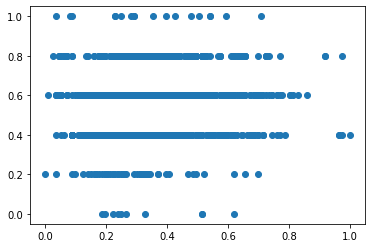

In [8]:
plt.scatter(df['fixed_acidity'], df['quality'])

0.008977969985995204


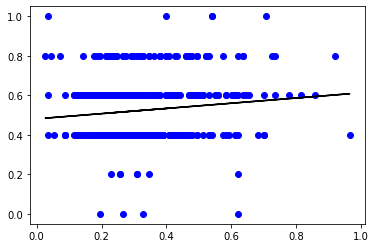

In [9]:
'''
Linear regression between fixed_acidity and quality
'''

X = np.array(df['fixed_acidity']).reshape(-1, 1)
y = np.array(df['quality']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression().fit(X_train, y_train)

print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [10]:
'''
Baseline model
'''

X = df[cols].drop(['quality'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

y_train_pred = np.full(y_train.shape, np.mean(y_train))

r2 = r2_score(y_train, y_train_pred)

print(r2)


0.0


In [11]:
'''
Multivariate linear regression (no regularization)
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

regr = LinearRegression()

y_train_pred = cross_val_predict(regr, X_train, y_train, cv=10)

r2 = r2_score(y_train, y_train_pred)

print(r2)

0.3655002500244413


In [12]:
'''
Multivariate linear regression (L2 regularization)
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# define model
model = Ridge(alpha=1.0)
# define model evaluation method

y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)

r2 = r2_score(y_train, y_train_pred)

print(r2)

0.3392851168363882


In [13]:
'''
Multivariate nonlinear regression (degree=2, L2 regularization)
'''


polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.25)

# define model
model = Ridge(alpha=1.5)
# define model evaluation method

y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)

r2 = r2_score(y_train, y_train_pred)

print(r2)

0.3371933637704052


In [14]:
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures()), ('model', Lasso(alpha=0.01))])

In [18]:
# degree 2 seems like it does the best
# we have fewer training examples, so we won't get results as good as Gregory's

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.25)

# define model
#model = Lasso(alpha=0.1)
# define model evaluation method

y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)

r2 = r2_score(y_train, y_train_pred)

print(r2)

-0.0018899235593992092


In [16]:
'''
Multivariate nonlinear regression (degree=2, LASSO regularization)
'''


polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_poly, y.squeeze(), test_size = 0.25)


# define model
model = LassoCV(cv = 10, alphas = [1.5], n_alphas = 1).fit(X_train, y_train)

print(model.score(X_train, y_train))

#y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)

r2 = r2_score(y_train, y_train_pred)

#print(r2)

0.0


In [17]:
'''
Multivariate nonlinear regression (degree=6, LASSO regularization)
'''

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.25)

# define model
model = Lasso(alpha=1.5)


y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)

r2 = r2_score(y_train, y_train_pred)
print(r2)

model.fit(X_test, y_test)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)

-0.0005191375648914143
0.0
